# 5 Resampling Methods
Resampling methods are an indispensable tool in modern statistics. They involve repeatedly drawing samples from a training set and refitting a model of interest on each sample in order to obtain additional information about the fitted model.We discuss two of the most commonly used resampling methods, cross-validation and the bootstrap.
## 5.1 Cross-Validation
The training error rate often is quite different from the test error rate, and in particular the former can dramatically underestimate the latter.In this section, we instead consider a class of methods that estimate the test error rate by holding out a subset of the training observations from the fitting process, and then applying the statistical learning method to those held out observations.
### 5.1.1  The Validation Set Approach
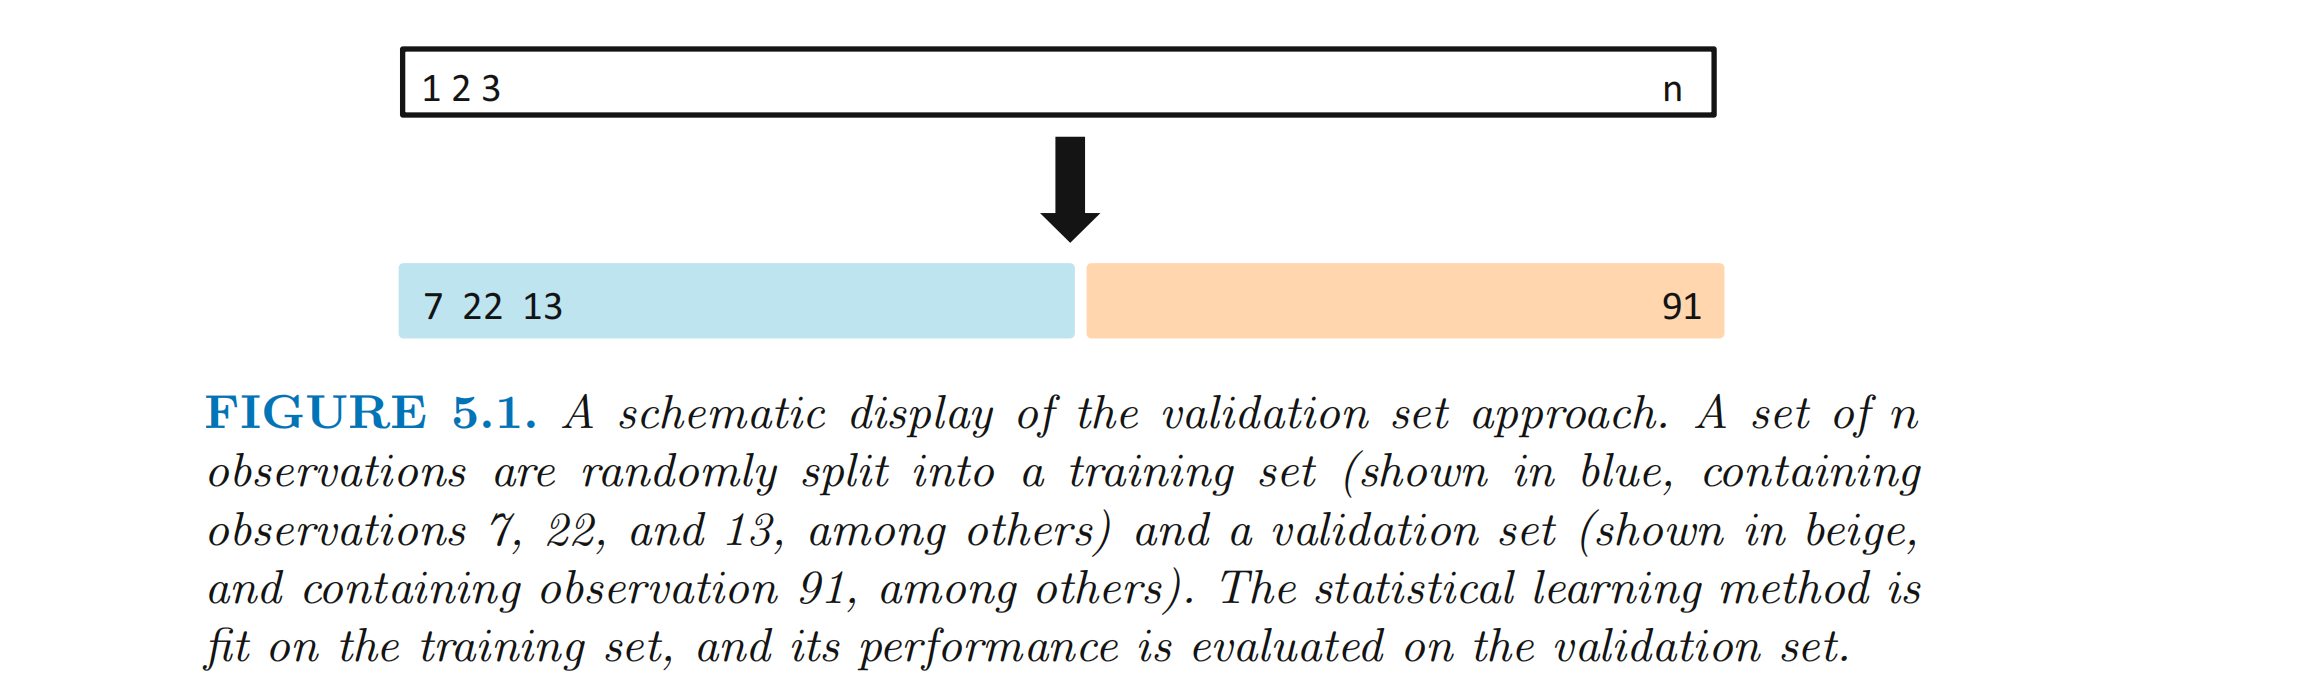

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

import os
path=os.getcwd()

In [230]:
data = pd.read_csv(os.path.join(path,'data','Auto.csv'),engine='python')
print(data.shape)
data.head()

(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [231]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [232]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [233]:
data['horsepower'] = data['horsepower'].replace('?',np.nan)
data = data.dropna()
data['horsepower'] = data['horsepower'].astype('int')
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [234]:
powers = np.arange(1,11)

In [235]:
errors = []
for power in powers:
    poly = PolynomialFeatures(power)#1-10次项
    X = poly.fit_transform(data['horsepower'].to_frame())
    y = data['mpg']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)#划分训练、测试数据，random_state为0时每次结果不同
    
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    errors.append(mean_squared_error(y_test,lr.predict(X_test)))

Text(0.5,1,'Validation Set')

<Figure size 864x432 with 0 Axes>

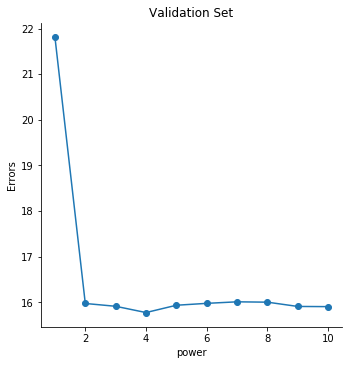

In [236]:
temp = pd.DataFrame({"power":powers,'Errors':errors})
plt.figure(figsize = (12,6))
g = sns.FacetGrid(data = temp,size=5)
g.map(plt.scatter, 'power' , 'Errors')
g.map(plt.plot, 'power', 'Errors')
plt.title('Validation Set')

In [237]:
errors_list = []
for i in range(10):
    errors = []
    for power in powers:
        poly = PolynomialFeatures(power)
        X = poly.fit_transform(data['horsepower'].to_frame())
        y = data['mpg']
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = i)

        lr = LinearRegression()
        lr.fit(X_train,y_train)
        errors.append(mean_squared_error(y_test,lr.predict(X_test)))#y和预测集比较
    errors_list.append(errors)  

In [238]:
data_dict = {'Errors'+ str(i):errors_list[i] for i in range(10)}
temp = pd.DataFrame(data_dict)
temp.index = powers

In [239]:
temp.head()

,Errors0,Errors1,Errors2,Errors3,Errors4,Errors5,Errors6,Errors7,Errors8,Errors9
1,21.811143,25.650160,28.827536,24.301369,19.272390,27.642677,23.776677,19.308620,21.060574,19.866369
2,15.977120,17.264520,23.742558,16.833850,13.476055,24.596552,17.410193,16.455937,12.453263,15.961779
3,15.915739,17.108497,23.604935,16.904634,13.398018,24.738484,17.722400,17.946887,12.251760,15.760263
4,15.778294,16.927266,24.277251,17.061203,13.286756,24.676498,18.807723,17.703585,12.478693,16.198389
5,15.938350,16.824431,25.036736,16.354700,12.552330,24.498951,16.656915,15.593692,12.468980,15.313375


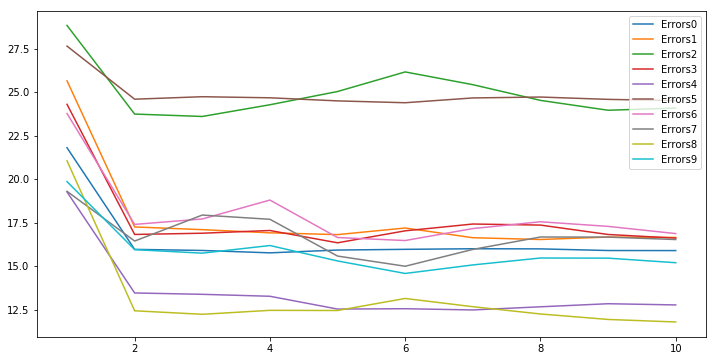

In [240]:
temp.plot.line(figsize = (12,6))

1. As is shown in the right-hand panel of Figure, the validation estimate of the test error rate can be highly variable, depending on precisely which observations are included in the training set and which observations are included in the validation set.
2. In the validation approach, only a subset of the observations—those that are included in the training set rather than in the validation set—are used to fit the model. Since statistical methods tend to perform worse when trained on fewer observations, this suggests that the validation set error rate may tend to overestimate the test error rate for the model fit on the entire data set.

### 5.1.2  Leave-One-Out Cross-Validation
Instead of creating two subsets of comparable size, a single observation $(x_1, y_1)$ is used for the validation set, and the remaining observations ${(x_2, y_2),...,(x_n, y_n)}$ make up the training set. The statistical learning method is fit on the $n−1$ training observations, and a prediction $\hat{y_1}$ is made for the excluded observation using its value $x_1$. 
$$MSE_1 = {(y_1−\hat{y}_1)}^2\tag{5.1}$$
$${CV}_{(n)}=\frac{1}{n}\sum_{i=1}^n MSE_i\tag{5.2}$$                                      

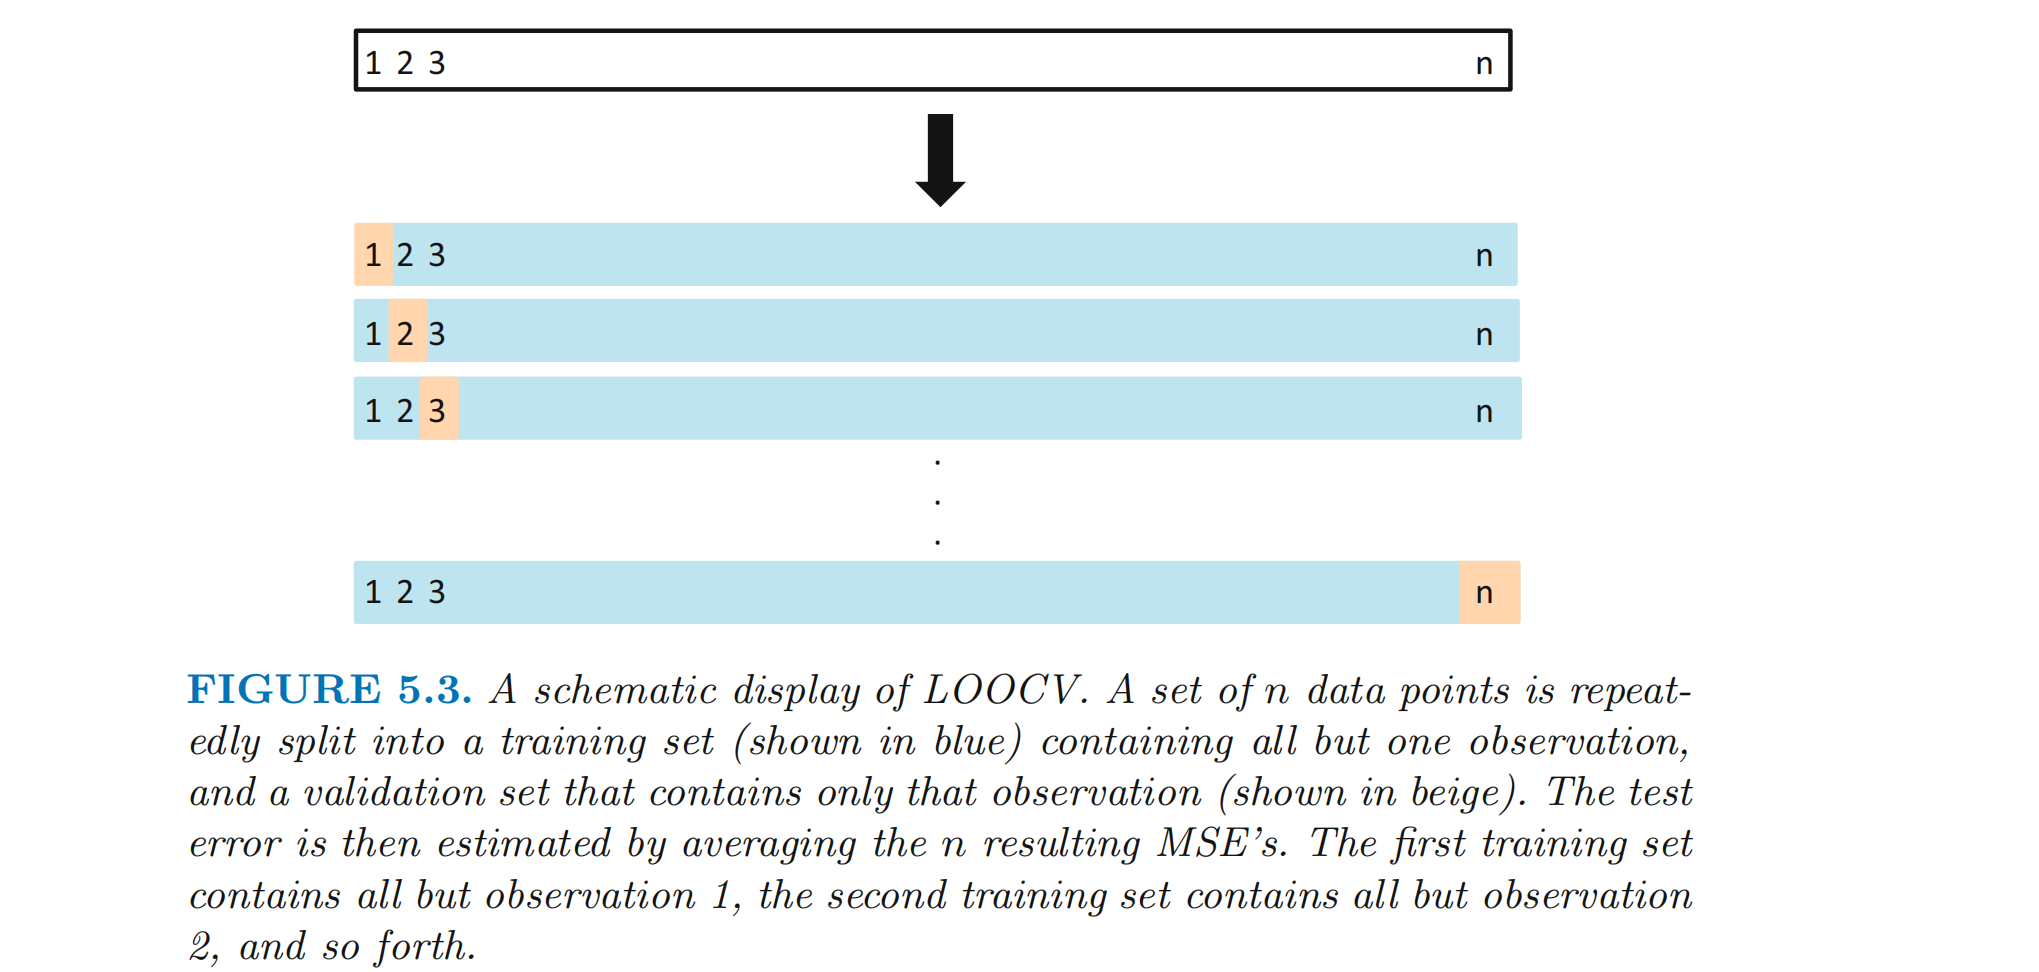
$${CV}_{(n)}=\frac{1}{n}\sum_{i=1}^n (\frac{y_i−\hat{y}_i}{1-h_i})^2\tag{5.3}$$  
$$h_i=\frac{1}{n}+\frac{(x_i-\overline{x})^2}{\sum_{i'=1}^n (x_{i'}-\overline{x})^2}\tag{5.4}$$

In [241]:
from sklearn.model_selection import cross_val_score  ##交叉验证
scores = []
n = len(data)
for power in range(1,11):
    poly = PolynomialFeatures(power,include_bias=False)
    X = poly.fit_transform(data['horsepower'].to_frame())
    y = data['mpg']
    lr = LinearRegression()
    scores.append(cross_val_score(lr,X,y,cv = n,scoring = 'neg_mean_squared_error').mean())

In [242]:
scores = list(map(abs,scores))
powers = np.arange(1,11)

(15, 28)

<Figure size 864x432 with 0 Axes>

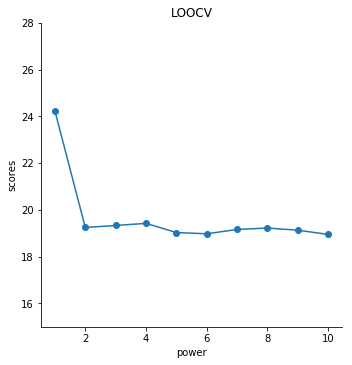

In [243]:
temp = pd.DataFrame({"power":powers,'scores':scores})
plt.figure(figsize = (12,6))
g = sns.FacetGrid(data = temp,size=5)
g.map(plt.scatter, 'power' , 'scores')
g.map(plt.plot, 'power', 'scores')
plt.title('LOOCV')
plt.ylim(15,28)

In [244]:
scores_list = []
from sklearn.utils import shuffle
for _ in range(10):
    scores = []
    n = len(data)
    for power in range(1,11):
        poly = PolynomialFeatures(power,include_bias=False)
        X = poly.fit_transform(data['horsepower'].to_frame())
        y = data['mpg']
        X,y = shuffle(X,y)
        lr = LinearRegression()
        scores.append(cross_val_score(lr,X,y,cv = 10,scoring = 'neg_mean_squared_error').mean())
    scores_list.append(list(map(abs,scores)))    

In [245]:
data_dict = {'Scores'+ str(i):scores_list[i] for i in range(10)}
temp = pd.DataFrame(data_dict)
temp.index = powers

In [246]:
temp.head()

,Scores0,Scores1,Scores2,Scores3,Scores4,Scores5,Scores6,Scores7,Scores8,Scores9
1,24.169095,24.267930,24.126977,24.320628,24.235269,24.250386,24.100580,24.157451,24.128125,24.352268
2,19.287678,19.125728,19.254058,19.294953,19.238809,19.264925,19.407405,19.470354,19.277926,19.121712
3,19.341976,19.475154,19.885369,19.224707,19.247523,19.329809,19.380036,19.235949,19.540366,19.419400
4,19.309653,19.396730,19.283112,19.336957,19.452024,19.501023,19.712741,19.475507,19.588227,19.552272
5,19.050181,19.471429,18.941972,18.772003,18.956761,19.123334,18.736436,19.053037,18.822580,19.118269


Text(0,0.5,'Error')

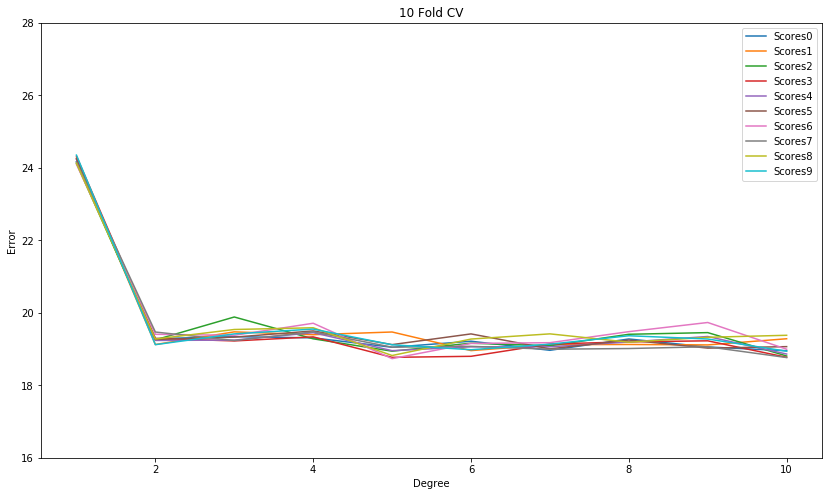

In [247]:
temp.plot.line(figsize = (14,8))
plt.ylim(16,28)
plt.title('10 Fold CV')
plt.xlabel('Degree')
plt.ylabel('Error')

### 5.1.3 k-Fold Cross-Validation
This approach involves randomly k-fold CV dividing the set of observations into $k$ groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining $k-1$ folds. The mean squared error, $MSE_1$, is then computed on the observations in the held-out fold.
$${CV}_{(k)}=\frac{1}{n}\sum_{i=1}^k MSE_i\tag{5.5}$$  
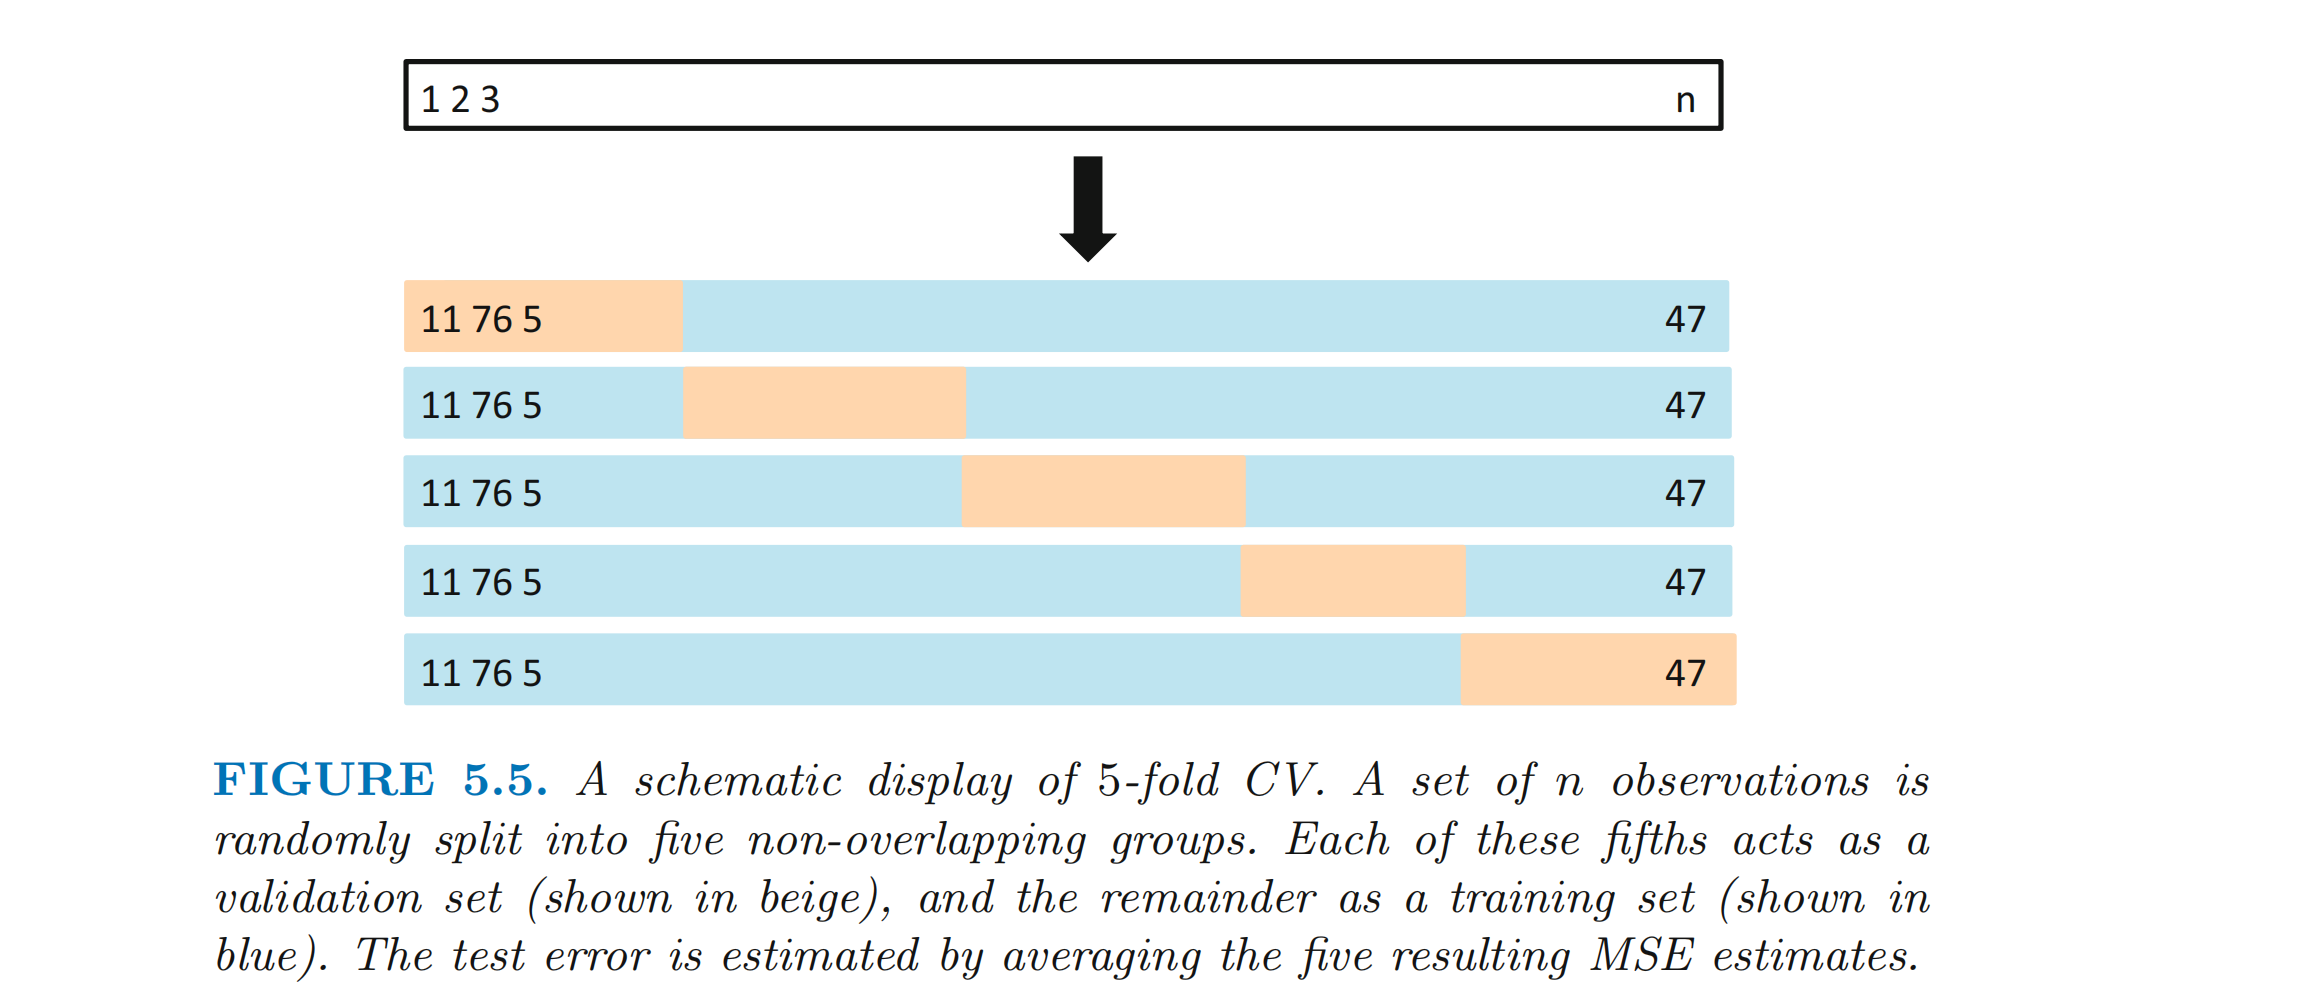

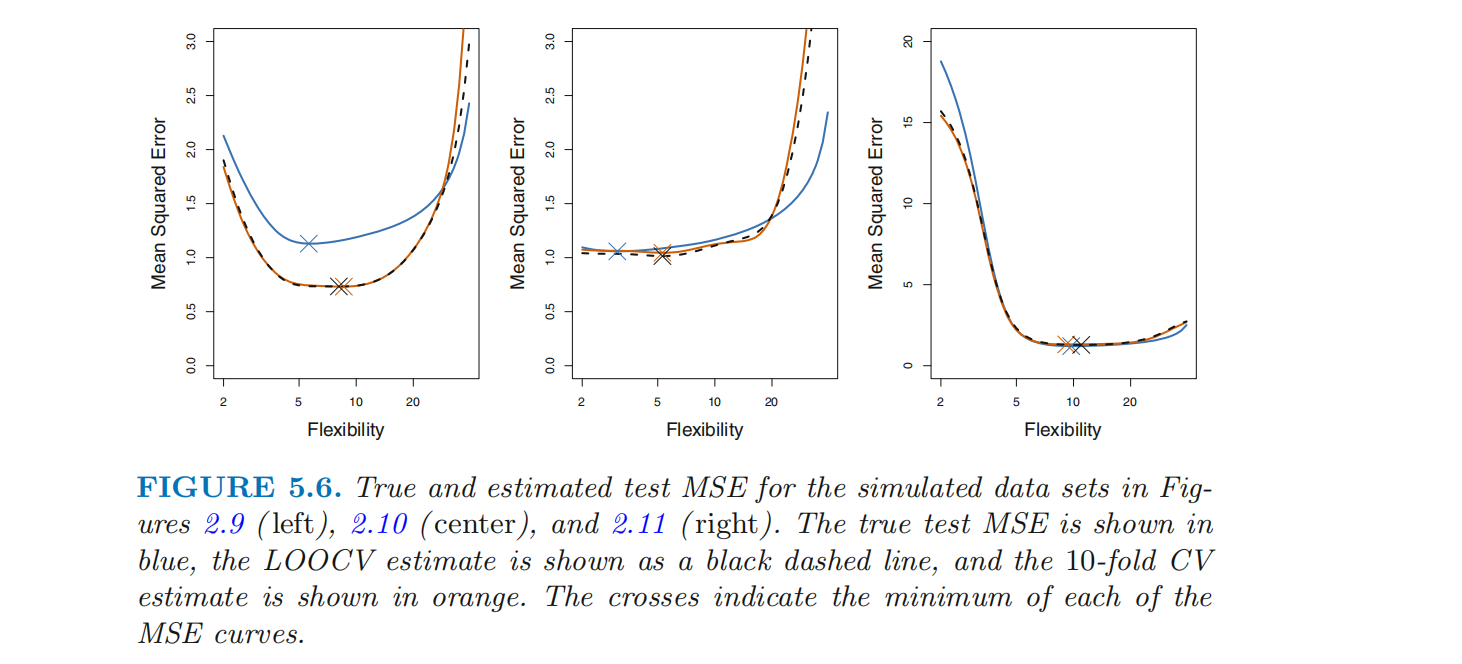

### 5.1.4 Bias-Variance Trade-Off for k-Fold Cross-Validation
Performing k-fold CV for, say, $k = 5$ or $k = 10$ will lead to an intermediate level of bias, since each training set contains $(k − 1)n/k$ observations—fewer than in the LOOCV approach, but substantially more than in the validation set approach.Therefore, from the perspective of bias reduction, it is clear that LOOCV is to be preferred to k-fold CV.  
However, we know that bias is not the only source for concern in an estimating procedure; we must also consider the procedure’s variance. It turns out that LOOCV has higher variance than does k-fold CV with $k<n$.
### 5.1.5 Cross-Validation on Classification Problems
$${CV}_{n)}=\frac{1}{n}\sum_{i=1}^k Err_i, Err_i=I(y_i\ne\hat{y}_i)\tag{5.6}$$ 
$$\log(\frac{p}{1-p})=\beta_0+\beta_1X_1+\beta_2X^2_1+\beta_3X_2+\beta_4X^2_2\tag{5.7}$$

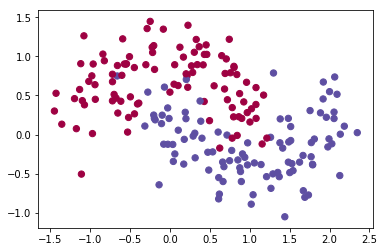

In [85]:
import sklearn
from sklearn import *
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.25)
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

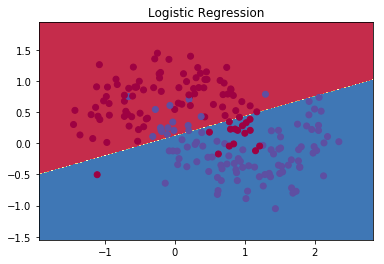

In [86]:
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
 
# 用预测函数预测一下
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
 
# 画图
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
 
from sklearn.linear_model import LogisticRegressionCV
 
# 训练逻辑回归分类器
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)
 
# 画决策边界
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")
plt.show()

In [83]:
powers = np.arange(1,11)
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score 
errors_list = []
scores_list = []
accuracy_train_list = []
for power in powers:
    np.random.seed(0)
    X, y = sklearn.datasets.make_moons(200, noise=0.25)
    poly = PolynomialFeatures(power,include_bias=False)#1-10次项
    X = poly.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)#划分训练、测试数据，random_state为0时每次结果不同
    clf = sklearn.linear_model.LogisticRegressionCV()
    clf.fit(X_train, y_train)
    errors = []
    errors.append(accuracy_score(y_test,clf.predict(X_test)))#测试错误率
    errors_list.append(errors) 
    
    accuracy_train = []
    accuracy_train = accuracy_score(y_train,clf.predict(X_train))##训练错误率
    accuracy_train_list.append(accuracy_train)
    
    score = []
    score = cross_val_score(clf,X,y,scoring='accuracy',cv = 10).mean()##10折CV错误率
    scores_list.append(score)

Text(0,0.5,'accuracy')

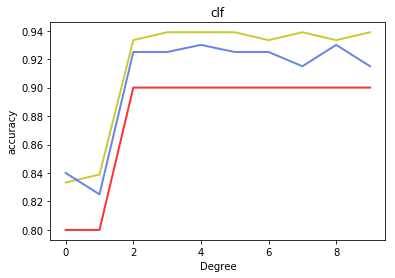

In [84]:
plt.plot( range(10),errors_list, color='r', alpha=0.8, linewidth=2)
plt.plot( range(10),accuracy_train_list, color='y', alpha=0.8, linewidth=2)
plt.plot( range(10),scores_list, color='#4169E1', alpha=0.8, linewidth=2)
plt.title('clf')
plt.xlabel('Degree')
plt.ylabel('accuracy')

In [71]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.25)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)
scores_list = []
accuracy_test_list = []
accuracy_train_list = []
for n in range(1,141):##从n=1开始
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    
    accuracy_test = []
    accuracy_test = accuracy_score(y_test,knn.predict(X_test))##测试错误率
    accuracy_test_list.append(accuracy_test)
    
    accuracy_train = []
    accuracy_train = accuracy_score(y_train,knn.predict(X_train))##训练错误率
    accuracy_train_list.append(accuracy_train)
    
    score = []
    score = cross_val_score(knn,X,y,scoring='accuracy',cv = 10).mean()##10折CV错误率
    scores_list.append(score)

Text(0,0.5,'accuracy')

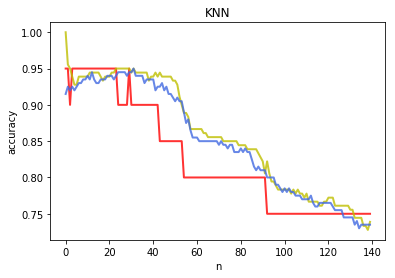

In [72]:
plt.plot( range(140),accuracy_test_list, color='r', alpha=0.8, linewidth=2)
plt.plot( range(140),accuracy_train_list, color='y', alpha=0.8, linewidth=2)
plt.plot( range(140),scores_list, color='#4169E1', alpha=0.8, linewidth=2)
plt.title('KNN')
plt.xlabel('n')
plt.ylabel('accuracy')

## 5.2 The Bootstrap
The power of the bootstrap lies in the fact that it can be easily applied to a wide range of statistical learning methods, including some for which a measure of variability is otherwise difficult to obtain and is not automatically output by statistical software
Example:we wish to determine the best investment allocation under a simple model.Minimize $Var(\alpha X+(1-\alpha)Y)$.
$$\alpha=\frac{\sigma^2_Y-\sigma_XY}{\sigma^2_X+\sigma^2_Y-2\sigma_XY}\tag{5.8}$$
where $\sigma^2_X=Var(X),\sigma^2_Y=Var(Y),2\sigma_{XY}=Cov(X,Y)$
$$\alpha=\frac{\hat\sigma^2_Y-\hat\sigma_{XY}}{\hat\sigma^2_X+\hat\sigma^2_Y-2\hat\sigma_{XY}}\tag{5.9}$$

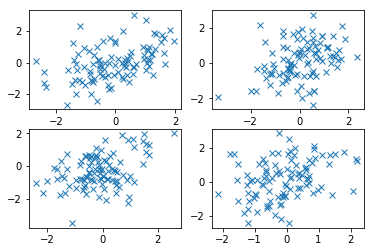

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1.25]], 100)
ax1.plot(X[:, 0], X[:, 1], 'x')
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1.25]], 100)
ax2.plot(X[:, 0], X[:, 1], 'x')
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1.25]], 100)
ax3.plot(X[:, 0], X[:, 1], 'x')
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1.25]], 100)
ax4.plot(X[:, 0], X[:, 1], 'x')

In [203]:
a_list = []
for _ in range(1000):
    X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1.25]], 100)##模拟生成数据，α=0.6
    a=(np.var(X[:, 1])-np.cov(X[:, 0],X[:, 1]))/(np.var(X[:, 0])+np.var(X[:, 1])-2*np.cov(X[:, 0],X[:, 1]))
    a = a[:, 1][0]    
    a_list.append(a)
a_mean = np.mean(a_list)
a_mean

0.599475318461756

In [204]:
a_deviation = np.std(a_list, ddof = 1)##设置成无偏的
a_deviation

0.08049120930757767

The mean over all 1,000 estimates for $\alpha $ is  
$$\overline{\alpha }=\frac{1}{1,000}\sum_{r=1}^{1,000} \hat\alpha _r=0.0.5995\tag{5.10}$$
very close to $\alpha  = 0.6$, and the standard deviation of the estimates is
$$ \sqrt {\frac{1}{1,000-1}\sum_{r=1}^{1,000} (\hat\alpha _r-\overline{\alpha })^2}=0.0805\tag{5.11}$$
The mean over all 1,000 estimates for $\alpha $ is 
This gives us a very good idea of the accuracy of $\hat\alpha:SE(\hat\alpha)\approx0.00209$ Soroughly speaking, for a random sample from the population, we would expect $\hat\alpha $ to differ from $\alpha $ by approximately 0.08, on average.

The bootstrap approach allows us to use a computer to emulate the process of obtaining new sample sets,so that we can estimate the variability of ˆα without generating additional samples.
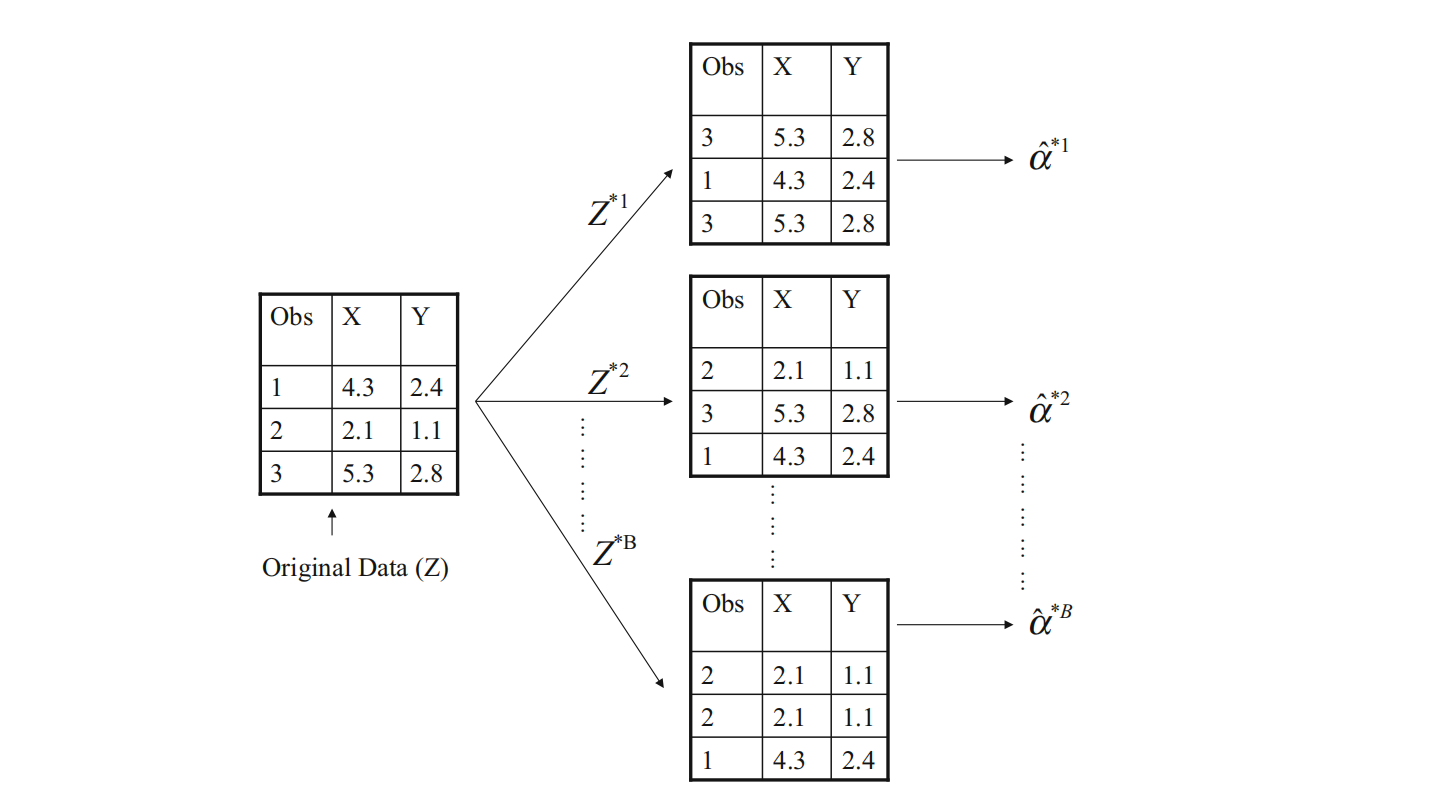

In [220]:
from random import choices
ab_list = []
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1.25]], 100)
for _ in range(1000):
    x = choices(X[:, 0], k=100)##无放回抽样
    y = choices(X[:, 1], k=100)
    ab = (np.var(y)-np.cov(x,y))/(np.var(x)+np.var(y)-2*np.cov(x,y))
    ab = ab[:, 1][0]    
    ab_list.append(ab)
ab_mean = np.mean(ab_list)
ab_mean

0.581204780566992

In [221]:
ab_deviation = np.std(ab_list, ddof = 1)##设置成无偏的
ab_deviation

0.0490942877512629

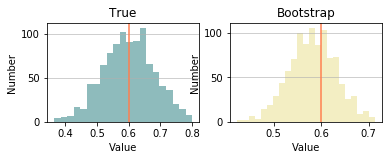

In [222]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
n, bins, patches =plt.hist(x=a_list, bins='auto', color='cadetblue',alpha=0.7, rwidth=10)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Number')
plt.title('True')
plt.axvline(0.6,c="coral")

ax2 = fig.add_subplot(2,2,2)
n, bins, patches =plt.hist(x=ab_list, bins='auto', color='palegoldenrod',alpha=0.7, rwidth=10)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Number')
plt.title('Bootstrap')
plt.axvline(0.6,c="coral")


Text(0,0.5,'Value')

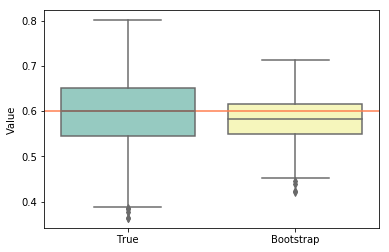

In [223]:
data =pd.DataFrame ({'True':a_list,'Bootstrap':ab_list})
sns.boxplot(data=data.iloc[:,0:2],palette="Set3")
plt.axhline(0.6,c="coral")
plt.ylabel('Value')

## 5.3 Lab: Cross-Validation and the Bootstrap

### 5.3.1 The Validation Set Approach
We explore the use of the validation set approach in order to estimate the test error rates that result from fitting various linear models on the Auto data set.we use the random_state parameter in order to set a seed for seed python’s random number generator, so that the reader of this book will obtain precisely the same results as those shown below.We select a random subset of 196 observations out of
the original 392 observations.

In [1]:
import statsmodels.api as sm
import random
import pandas as pd 
import numpy  as  np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score  ##交叉验证
import warnings
warnings.filterwarnings("ignore")

In [2]:
Auto = pd.read_csv('Auto.csv')
# Horsepower has strings, convert to np.nan
Auto['horsepower'] = Auto['horsepower'].replace('?', np.nan).astype(float)
Auto = Auto.dropna()
Auto.shape

(392, 9)

In [46]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,22500.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,19600.0


In [5]:
mpg=Auto['mpg']
horsepower=Auto['horsepower']

In [6]:
def get_error(data,power,seed):
    '''
    power:多项式的最高幂次
    seed:随机种子数值
    '''
    n = len(data)
    poly = PolynomialFeatures(power,include_bias=False)
    horsepower = poly.fit_transform(Auto['horsepower'].to_frame())
    mpg=Auto['mpg']
    X_train,X_test,y_train,y_test = train_test_split(horsepower,mpg,test_size = 0.5,random_state = seed)
    ols = sm.OLS(y_train,sm.add_constant(X_train),missing='drop').fit() # Drop the missing value
    y_predict= ols.predict(sm.add_constant(X_test))
    return mean_squared_error(y_test,y_predict)   ##计算均方误差

In [7]:
get_error(Auto,1,0)  ##一元一次回归，随机种子为0

23.61661706966988

In [8]:
get_error(Auto,2,0)  ##一元二次回归，随机种子为0

18.763031346897098

In [9]:
get_error(Auto,3,0)  ##一元三次回归，随机种子为0

18.796941632643296

In [10]:
get_error(Auto,1,1)  ##一元一次回归，随机种子为1

24.80212062059357

In [11]:
get_error(Auto,2,1)  ##一元二次回归，随机种子为1

18.848292603274214

In [12]:
get_error(Auto,3,1)  ##一元三次回归，随机种子为1

18.805111358391517

* A model that predicts mpg using a quadratic function of horsepower performs better than a model that involves only a linear function of horsepower,, and there is little evidence in favor of a model that uses a cubic function of horsepower.

### 5.3.2 Leave-One-Out Cross-Validation

* we can automatically compute the estimators for any generalized linear model using the sm.formula.glm() functions and sm.OLS(),but i find that sm.formula.glm() and sm.OLS() can't go cross-validation.so I combine LinearRegression() and cross_val_score() to go cross-validation.

In [15]:
# 用OLS回归
ols = sm.OLS(mpg,sm.add_constant(horsepower),missing='drop').fit() # Drop the missing value
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           7.03e-81
Time:                        16:26:10   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# 用广义线性回归
glm=sm.formula.glm("mpg~ horsepower", data=Auto).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    mpg   No. Observations:                  392
Model:                            GLM   Df Residuals:                      390
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          24.066
Method:                          IRLS   Log-Likelihood:                -1178.7
Date:                Tue, 23 Mar 2021   Deviance:                       9385.9
Time:                        16:26:21   Pearson chi2:                 9.39e+03
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.530      41.342
horsepower    -0.1578      0.006    -24.489      0.000      -0.170      -0.145
==============================================================================
"""

In [18]:
scores = []
n = len(Auto)  #n为交叉验证的折数，此处留一交叉验证中n为样本数量
for power in range(1,6):
    poly = PolynomialFeatures(power,include_bias=False)
    X = poly.fit_transform(Auto['horsepower'].to_frame())
    y = Auto['mpg']
    lr = LinearRegression()
    scores.append(-cross_val_score(lr,X,y,cv = n,scoring = 'neg_mean_squared_error').mean())
print('均方误差的均值：')
scores

均方误差的均值：


[24.231513517929226,
 19.248213124489677,
 19.334984064029175,
 19.424430310525526,
 19.03321208374037]

### 5.3.3 k-Fold Cross-Validation
*  The cross_val_score() function can also be used to implement k-fold CV. Below we use k = 10, a common choice for k, on the Auto data set.

In [20]:
##k=10
random.seed(17)
scores = []
for power in range(1,11):
    poly = PolynomialFeatures(power,include_bias=False)
    X = poly.fit_transform(Auto['horsepower'].to_frame())
    y = Auto['mpg']
    lr = LinearRegression()
    scores.append(-cross_val_score(lr,X,y,cv = 10,scoring = 'neg_mean_squared_error').mean())
scores

[27.439933652339867,
 21.235840055802235,
 21.33660618322732,
 21.35388698137593,
 20.90564041386055,
 20.78089595969293,
 20.983284725982564,
 21.07765383909857,
 21.037310108207016,
 20.98140725217811]

### 5.3.4 The Bootstrap
We illustrate the use of the bootstrap in the simple example of Section 5.2,
as well as on an example involving estimating the accuracy of the linear
regression model on the Auto data set.

* Estimating the Accuracy of a Statistic of Interest
* Example:we wish to determine the best investment allocation under a simple model.Minimize $Var(\alpha X+(1-\alpha)Y)$.
where $\sigma^2_X=Var(X),\sigma^2_Y=Var(Y),2\sigma_{XY}=Cov(X,Y)$
$$\alpha=\frac{\hat\sigma^2_Y-\hat\sigma_{XY}}{\hat\sigma^2_X+\hat\sigma^2_Y-2\hat\sigma_{XY}}\tag{5.9}$$

In [23]:
portfolio=pd.read_csv('portfolio.csv',index_col=0)
portfolio.head()

,X,Y
1,-0.895251,-0.234924
2,-1.562454,-0.885176
3,-0.417090,0.271888
4,1.044356,-0.734198
5,-0.315568,0.841983


In [24]:
#风险最小时的alpha
def get_alpha(data,index):
    x=data.iloc[index,0]
    y=data.iloc[index,1]
    alpha=(np.cov(y)-np.cov(x,y))/(np.cov(x)+np.cov(y)-2*np.cov(x,y))
    return alpha[0,1]  

In [25]:
get_alpha(portfolio,list(range(100)))   ##基于全样本计算的风险最小时的alpha

0.5758320745928298

In [26]:
#进行一次随机抽样，风险最小时的alpha
np.random.seed(0)
index=np.random.choice(range(100),100,replace=True) 
get_alpha(portfolio,index)

0.5596158281037941

In [27]:
#进行1000次随机抽样，风险最小时的alpha
alpha_list=[]
for _ in range(1000):
    index=np.random.choice(range(100),100,replace=True) 
    alpha=get_alpha(portfolio,index)
    alpha_list.append(alpha)
alpha_est=np.mean(alpha_list)    
alpha_deviation = np.std(alpha_list, ddof = 1)##设置成无偏的
print('alpha:',alpha_est,'估计误差:',alpha_deviation)

alpha: 0.5795622652632741 估计误差: 0.08878472522902055


* Estimating the Accuracy of a Linear Regression Model
* The bootstrap approach can be used to assess the variability of the coefficient estimates and predictions from a statistical learning method. Here
we use the bootstrap approach in order to assess the variability of the
estimates for $\beta$0 and $\beta$1, the intercept and slope terms for the linear regression model that uses horsepower to predict mpg in the Auto data set. 

In [29]:
#计算回归系数
def get_params(data,Y,X,index):
    glm=sm.formula.glm(Y+"~"+X, data=data.iloc[index,]).fit()
    params=glm.params
    return params

In [30]:
get_params(Auto,"mpg","horsepower",list(range(392)))  ##全样本的线性回归

Intercept     39.935861
horsepower    -0.157845
dtype: float64

In [31]:
random.seed(1)
index=np.random.choice(range(392),392,replace=True)
get_params(Auto,"mpg","horsepower",index)     ##一次随机抽样的线性回归

Intercept     40.239109
horsepower    -0.161896
dtype: float64

In [58]:
#采用bootstrap方法估计回归系数及估计误差
def boot(data,Y,X,R):
    '''
    Y：因变量名
    X:自变量名
    R：重抽样次数
    '''
    params_list=[]
    for _ in range(R):
        index=np.random.choice(range(392),392,replace=True)
        params=get_params(Auto,Y,X,index)
        params_list.append(params)
    param=np.stack(params_list)
    return "回归系数：{params}, 估计误差: {error}".format(params=np.mean(param,axis=0), error=np.std(param,axis=0, ddof = 1))

In [59]:
boot(Auto,"mpg","horsepower",1000)    ##1000次随机抽样的线性回归

'回归系数：[39.95814206 -0.15799266], 估计误差: [0.84508414 0.00732834]'

In [50]:
glm=sm.formula.glm("mpg~ horsepower", data=Auto.iloc[0:392,]).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    mpg   No. Observations:                  392
Model:                            GLM   Df Residuals:                      390
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          24.066
Method:                          IRLS   Log-Likelihood:                -1178.7
Date:                Tue, 23 Mar 2021   Deviance:                       9385.9
Time:                        16:47:28   Pearson chi2:                 9.39e+03
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.530      41.342
horsepower    -0.1578      0.006    -24.489      0.000      -0.170      -0.145
==============================================================================
"""

* The standard error estimates are somewhat different from the estimates obtained using the bootstrap. the standard formulas assume (somewhat unrealistically) that the xi are fixed, and all the variability comes from the variation in the errors $\epsilon$i.
* The bootstrap approach does not rely on any of these assumptions, and so it is likely giving a more accurate estimate of the standard errors of β0 and β1 than is the summary() function

In [60]:
Auto['horsepower2']=Auto['horsepower']**2
res=boot(Auto,"mpg","horsepower+horsepower2",1000)
res

'回归系数：[ 5.69115502e+01 -4.66765463e-01  1.23385717e-03], 估计误差: [2.12769477e+00 3.40673157e-02 1.22987666e-04]'

In [52]:
glm2=sm.formula.glm("mpg~ horsepower+horsepower2", data=Auto.iloc[0:392,]).fit()
glm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    mpg   No. Observations:                  392
Model:                            GLM   Df Residuals:                      389
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          19.131
Method:                          IRLS   Log-Likelihood:                -1133.2
Date:                Tue, 23 Mar 2021   Deviance:                       7442.0
Time:                        16:47:36   Pearson chi2:                 7.44e+03
No. Iterations:                     3   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.9001      1.800     31.604      0.000      53.371      60.429
horsepower     -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower2     0.0012      0.000     10.080      0.000       0.001       0.001
===============================================================================
"""

#### 注意：python中的np.var()与R中的var()计算方式有差异：
* python中的np.var()计算的是总体方差，分母是n
* R中的var()计算的是样本方差，分母是n-1
* python中的np.cov(x)计算的是样本方差，分母是n-1
####  python中np.cov(x,y)与R中np.cov(x,y)返回值不同：
* python中np.cov(x,y)，返回协方差矩阵
* R中np.cov(x,y)，返回协方差

In [53]:
x=portfolio['X']
y=portfolio['Y']
np.var(x)   #计算的是总体方差，分母是n

1.1173559345375694

In [54]:
np.mean((x-np.mean(x))**2)

1.1173559345375694

In [55]:
np.cov(x)  #np.cov(x)计算的是样本方差，分母是n-1

array(1.12864236)

In [56]:
sum((x-np.mean(x))**2)/(len(x)-1)

1.128642358118757

In [57]:
np.cov(x[:],y[:])   #python中np.cov(x,y)，返回协方差矩阵

array([[1.12864236, 0.62635829],
       [0.62635829, 1.30823747]])